In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.1 MB/s eta 0:00:00


In [ ]:
import mne
import pandas as pd
from scipy.signal import lfilter
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

#mne.viz.set_browser_backend('qt')

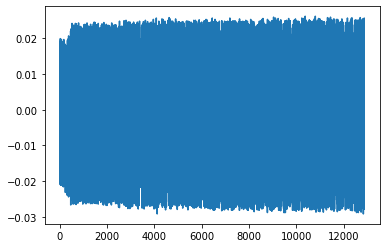

In [ ]:
csv = pd.read_csv("drive/MyDrive/raw.csv")
csv.drop(csv.tail(1).index,inplace=True)
csv = csv[(np.abs(stats.zscore(csv)) < 5).all(axis=1)]
ref = csv['ch2'] - csv['ch3']
signal = csv['ch1'] - ref
plt.plot(signal)

[-9.500e-05 -6.400e-04 -8.100e-04 ...  2.850e-04  1.245e-03 -3.900e-04]
[-9.4999999999996e-05, -0.000639999999999988, -0.000809999999999988, -4.999999999999211e-05, 0.0004000000000000079, 0.0006900000000000079, 0.0005300000000000118, 2.0000000000015773e-05, 0.0005150000000000118, 0.0009250000000000118, 0.0008400000000000158, 1.0000000000019759e-05, -1.4999999999976241e-05, 0.00029500000000002376, 0.0007300000000000198, 0.0002550000000000279, -0.0005449999999999722, -0.0007349999999999681, 6.000000000002791e-05, 0.00034000000000002393, 0.00013500000000002797, -0.000704999999999968, -0.000529999999999968, 7.500000000002795e-05, 0.00047500000000002797, -0.00024999999999997203, -0.00045499999999998027, -0.000339999999999976, -0.00033499999999997616, -0.00036999999999997603, -0.0010849999999999718, -0.0017349999999999722, -0.001424999999999972, -0.0011399999999999679, -0.0012749999999999645, -0.001394999999999964, -0.0013849999999999679, -0.001179999999999972, -0.000909999999999972, -0.0009

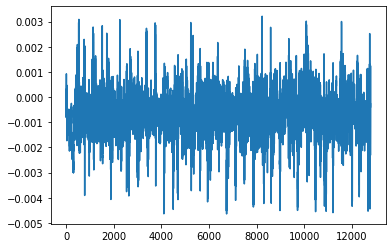

In [ ]:
n = 25
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, signal)
print(yy)
z_scores = np.abs(stats.zscore(yy))
#plt.plot(yy)
yy = [yy[n] for n in range(len(yy)) if z_scores[n] < 4]
print(yy)
plt.plot(yy) 

In [ ]:
info = mne.create_info(1, 75, 'eeg')
data = mne.io.RawArray([yy], info)

Creating RawArray with float64 data, n_channels=1, n_times=12782
    Range : 0 ... 12781 =      0.000 ...   170.413 secs
Ready.


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


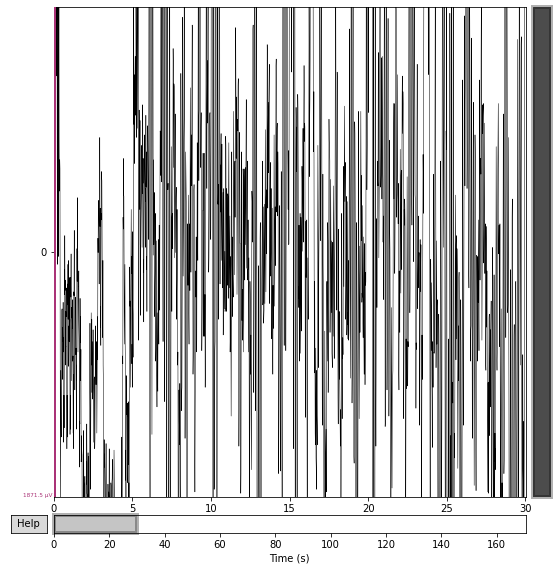

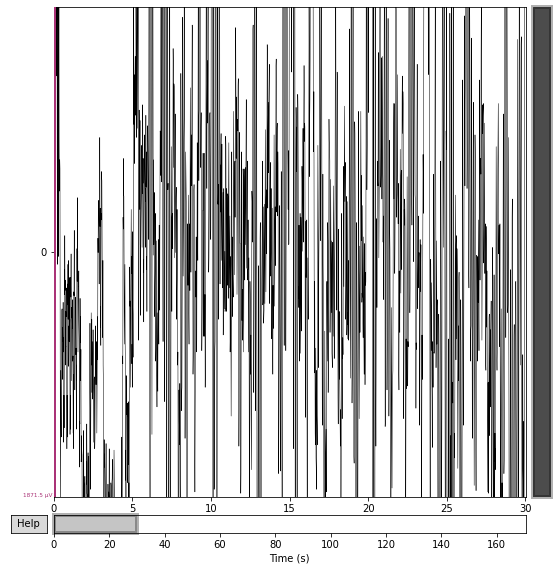

In [ ]:
data.plot(duration = 30D, scalings='auto') #Plot Basic

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 27.307 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-36-cfd892e49e99>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


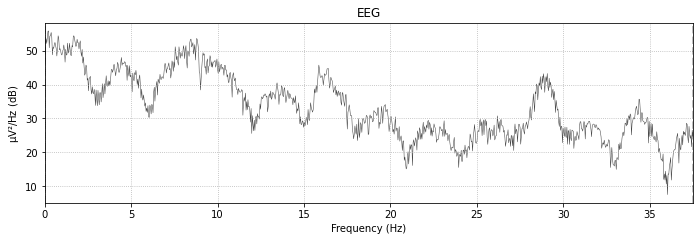

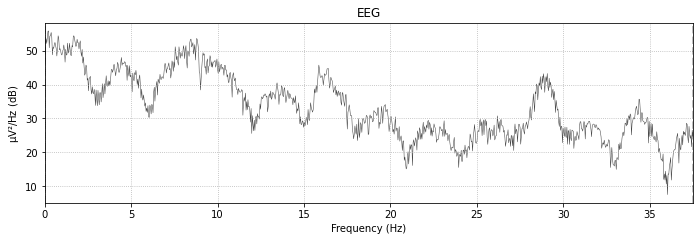

In [ ]:
data.plot_psd()

In [ ]:
import numpy as np

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 34.75 Hz)
- Filter length: 249 samples (3.320 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 27.307 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-47-667ca50c60e2>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filt_raw.plot_psd()


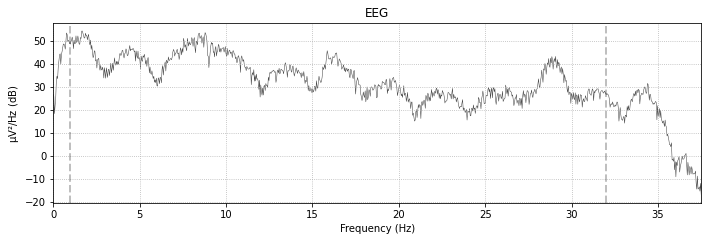

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


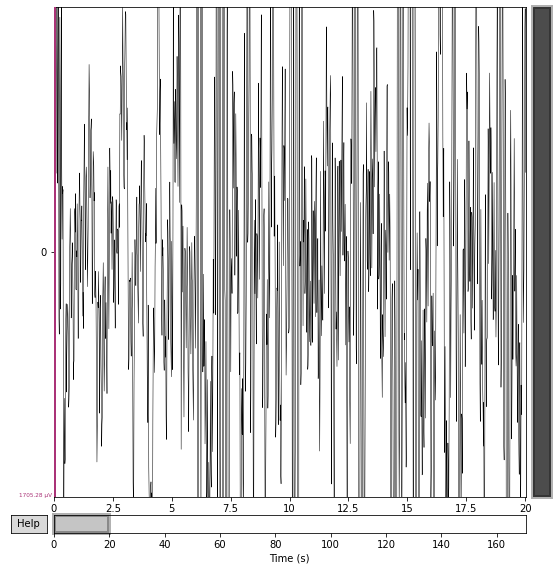

             time             0
0        0.000000 -2.710505e-19
1        0.013333 -5.220029e-04
2        0.026667 -6.884340e-04
3        0.040000  1.096683e-04
4        0.053333  5.453098e-04
...           ...           ...
12777  170.360000 -1.842871e-03
12778  170.373333 -1.257807e-03
12779  170.386667  7.133812e-04
12780  170.400000  1.644738e-03
12781  170.413333 -4.743385e-20

[12782 rows x 2 columns]


In [ ]:
filt_raw = data.copy().filter(l_freq=1, h_freq=32)
filt_raw.plot_psd()
filt_raw.plot(duration=20, scalings='auto')
print(filt_raw.to_data_frame(scalings=dict(eeg=1)))

In [ ]:
ica = mne.preprocessing.ICA(n_components=None, max_iter='auto', random_state=1)
new_data = ica.fit(filt_raw)
ica

Fitting ICA to data using 1 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 1 components
Fitting ICA took 0.0s.


Method,fastica
Fit,1 iterations on raw data (12782 samples)
ICA components,1
Available PCA components,1
Channel types,eeg
ICA components marked for exclusion,—


Applying ICA to Raw instance
    Transforming to ICA space (1 component)
    Zeroing out 0 ICA components
    Projecting back using 1 PCA component


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


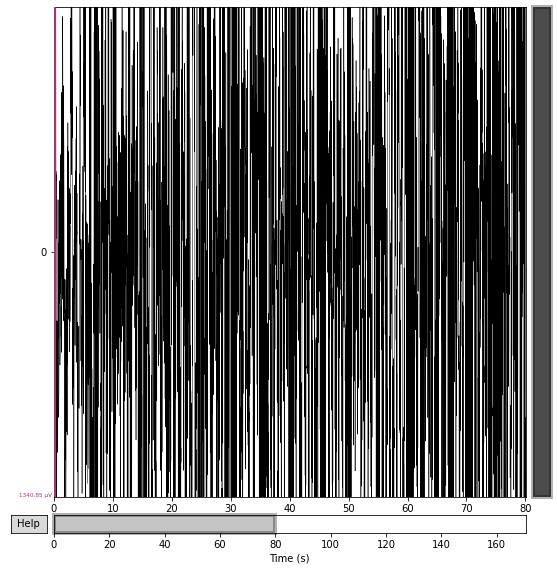

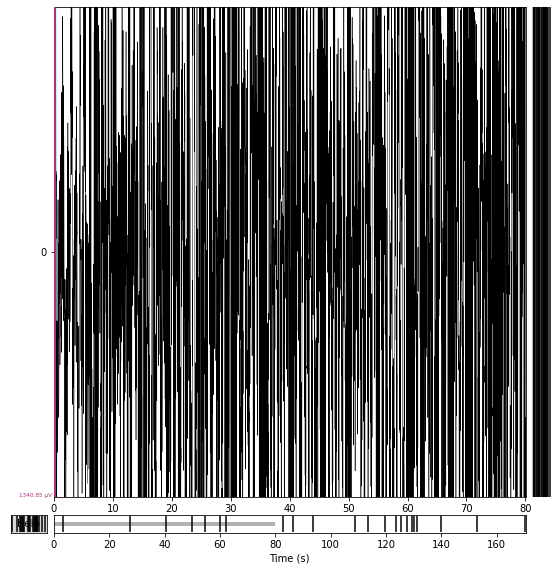

In [ ]:
reconst_raw = filt_raw.copy()
BLINK_TIMES = [3.256,27.493,40.367,49.954,54.705,59.932,62.02,82.876,86.506,93.762,108.902,113.398,119.557,123.655,125.266,127.693,129.375,130.225,131.258,139.9,152.801,170.144]
ica.apply(reconst_raw)
fig = reconst_raw.plot(duration = 80, scalings="auto")
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    ax.vlines(5, -1, 1)
    for blink in BLINK_TIMES:
      ax.vlines(blink, -10000, 10000)
fig

Creating RawArray with float64 data, n_channels=1, n_times=12782
    Range : 0 ... 12781 =      0.000 ...   170.413 secs
Ready.


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


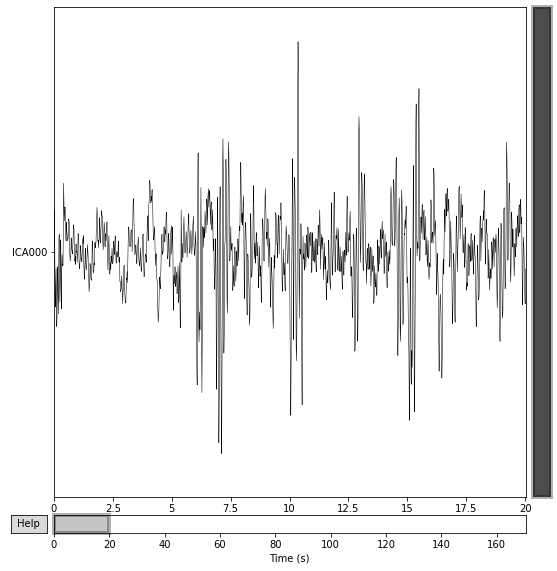

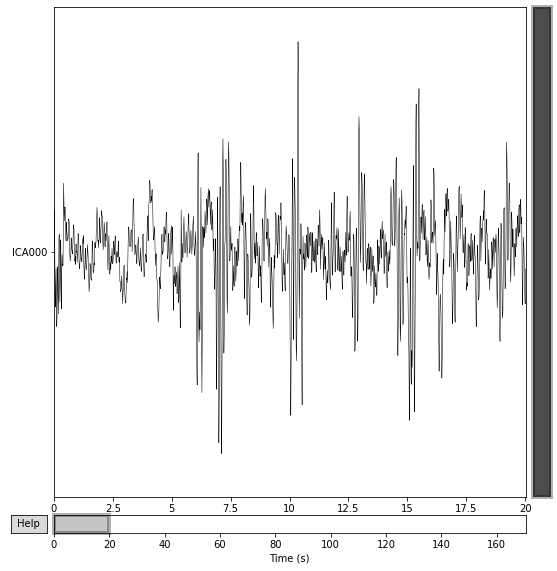

In [ ]:
ica.plot_sources(filt_raw)

Applying ICA to Raw instance
    Transforming to ICA space (1 component)
    Zeroing out 0 ICA components
    Projecting back using 1 PCA component


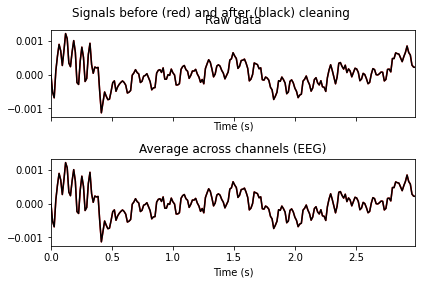

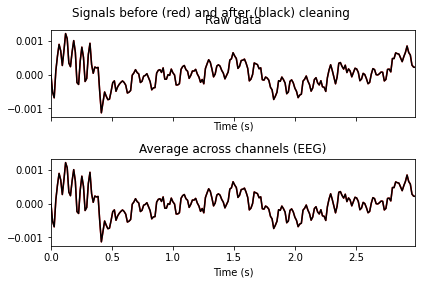

In [ ]:
filt_raw.load_data()
ica.plot_overlay(filt_raw, picks='eeg')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 27.307 (s)


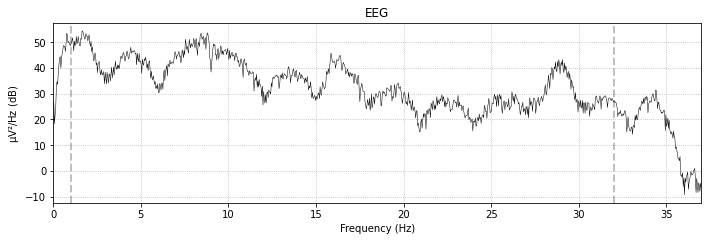

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


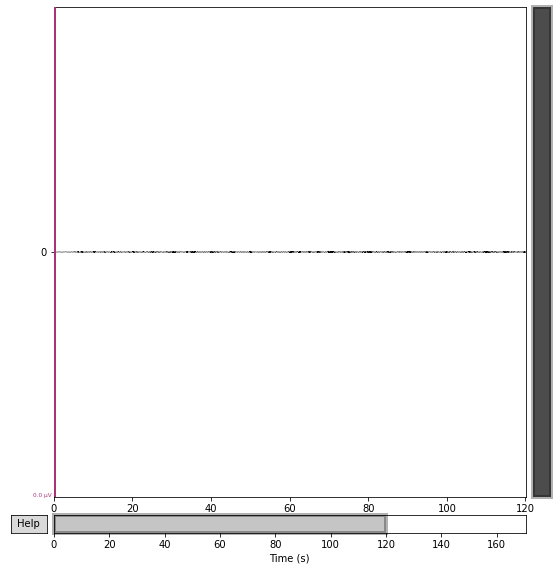

             time             0
0        0.000000 -2.710505e-19
1        0.013333 -5.220029e-04
2        0.026667 -6.884340e-04
3        0.040000  1.096683e-04
4        0.053333  5.453098e-04
...           ...           ...
12777  170.360000 -1.842871e-03
12778  170.373333 -1.257807e-03
12779  170.386667  7.133812e-04
12780  170.400000  1.644738e-03
12781  170.413333 -4.743385e-20

[12782 rows x 2 columns]


In [ ]:
filt_raw.plot_psd(tmax=np.inf, fmax=37, average=True)
filt_raw.plot(scalings="auto", duration=120)
filtdf = filt_raw.to_data_frame(scalings=dict(eeg=1))
print(filtdf)

In [ ]:
filtdf['blink'] = 0
print(filtdf)

             time             0  blink
0        0.000000 -2.710505e-19      0
1        0.013333 -5.220029e-04      0
2        0.026667 -6.884340e-04      0
3        0.040000  1.096683e-04      0
4        0.053333  5.453098e-04      0
...           ...           ...    ...
12777  170.360000 -1.842871e-03      0
12778  170.373333 -1.257807e-03      0
12779  170.386667  7.133812e-04      0
12780  170.400000  1.644738e-03      0
12781  170.413333 -4.743385e-20      0

[12782 rows x 3 columns]


In [ ]:
PADDING = 10

BLINK_TIMES = [3.256,27.493,40.367,49.954,54.705,59.932,62.02,82.876,86.506,93.762,108.902,113.398,119.557,123.655,125.266,127.693,129.375,130.225,131.258,139.9,152.801,170.144]
for blink in BLINK_TIMES:
  loc = filtdf['time'].sub(blink).abs().idxmin()
  filtdf['blink'][loc-PADDING:loc+PADDING] = 1

print(list(filtdf['blink']).count(1), len(BLINK_TIMES))
filtdf.to_csv("edited.csv")
print("Saved to CSV")

440 22
Saved to CSV


<ipython-input-60-741ce4a4217e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtdf['blink'][loc-PADDING:loc+PADDING] = 1
